# __Hospitality__

### Importing required libraries

In [1]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Hospitality is divided into _five_ subcategories: 

# __5. Waiting :__

In [3]:
#Importing dataset
df = pd.read_csv("/Users/harshith/Downloads/Week 3 - New/Hospitality/waiting referesh.csv")
df.head()

,text,sentiment
0,this airline is just a pain after waiting for ...,Negative
1,i remember i was sitting in bangalore airport ...,Neutral
2,unstablemaria and then you ll be waiting at t...,Neutral
3,as much as bangalore airport t2 is wonderful i...,Negative
4,looks like the waiting area in first floor at ...,Positive


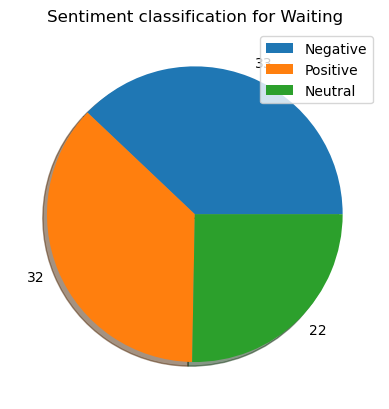

In [4]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
wait_count = val.values

#Plotting a pie chart
plt.pie(wait_count, labels = wait_count, shadow= True)
plt.title("Sentiment classification for Waiting")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding waiting:

### Topic Modelling

In [5]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['text'].tolist()

#Creating custom stop words
custom = ["amp","international","dhaba","malgudi","fancy","boyzone","recycle","kiosk","idli","meltwith","pvt","organic"]
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 10
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: time, flight, queue, fun, white, chennai, home, reached, used, lol
Topic 2: time, flight, sitting, minutes, chennai, crew, service, indigo6e, just, taxi
Topic 3: time, hour, akasaair, past, midnight, security, food, guys, need, flight
Topic 4: time, book, service, cab, 30, cabs, don, let, just, know
Topic 5: air, area, long, 30, lol, fun, que, hundreds, better, india
Topic 6: need, night, care, passenger, indigo6e, said, passengers, area, queue, flight
Topic 7: help, don, know, used, 20, hyderabad, india, people, area, flight
Topic 8: taxi, uber, minutes, time, minimum, 40, reached, home, just, service
Topic 9: passengers, area, queue, flight, long, help, service, hour, don, time
Topic 10: hours, uber, people, check, currently, flight, passengers, lot, white, matter


/Users/harshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud

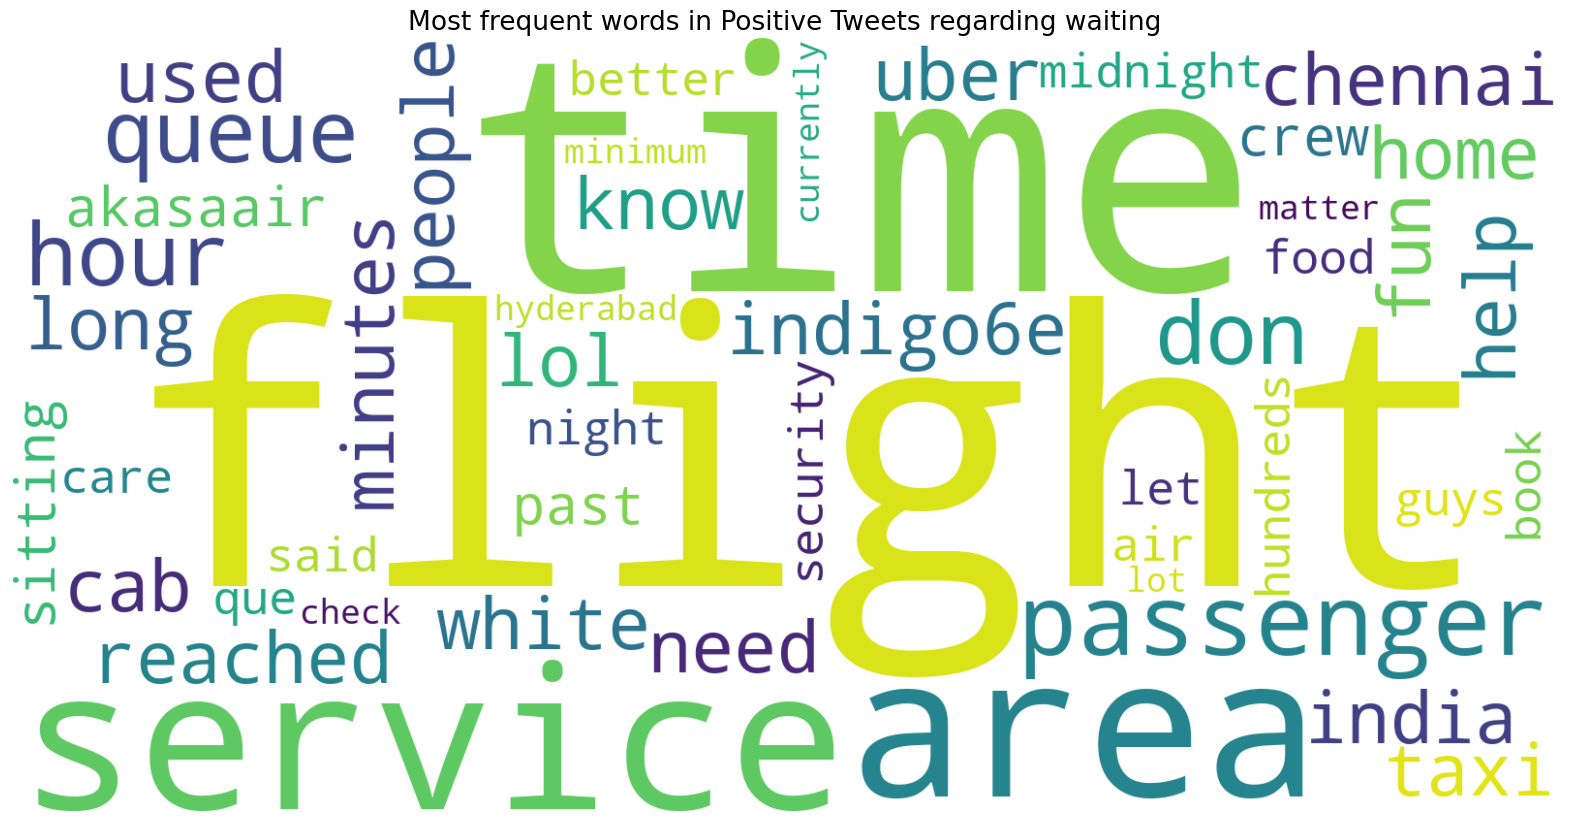

In [6]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding waiting', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding waiting
#### 1. Queues have been greatly eliminated with the help of digi Yatra
#### 2. Travllers appreciatie fast check-in taking minimal amount of time
#### 3. Taxis are easy to book and are immediately available on arrival

## b.Topic modelling and wordcloud for negative tweets regarding waiting:

### Topic Modelling

In [7]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['text'].tolist()

#Creating custom stop words
custom = []
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 10
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: mins, airindia, luggage, t2, service, staff, guys, hours, long, uber
Topic 2: flight, experience, hours, pune, customer, travelling, staff, amp, akasaair, 00
Topic 3: passengers, missed, people, hour, akasaair, bag, inaugurated, remains, matter, fancy
Topic 4: akasaair, money, guys, mins, hours, 20, just, taking, flight, 10
Topic 5: time, t2, service, taxi, long, 40, pathetic, half, city, big
Topic 6: service, staff, just, 30, worst, minutes, baggage, till, run, took
Topic 7: flight, uber, t2, delayed, mumbai, problem, landed, cab, help, hour
Topic 8: uber, hours, indigo, people, queue, wrong, indigo6e, way, today, going
Topic 9: cabs, ola, time, long, queue, uber, guys, staff, zone, uber_india
Topic 10: t2, service, staff, guys, hours, mins, long, uber, flight, bag


### Word Cloud

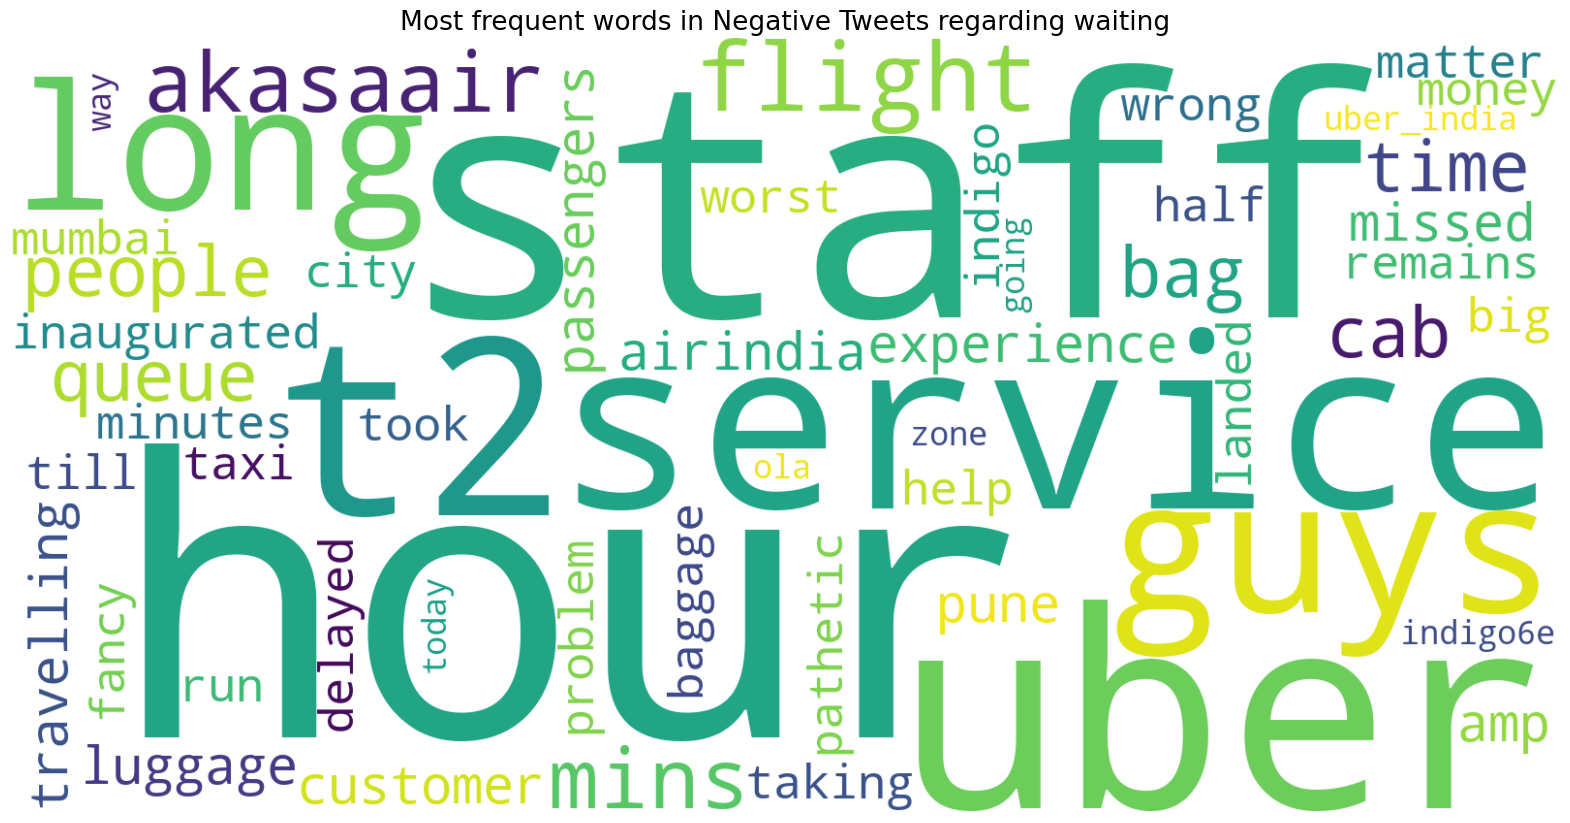

In [8]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding waiting', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding Waiting
#### 1. People have complained about long queue waiting for Ola and Uber on particular terminals due to immproper administration 
#### 2. Delayed flights are not handled well and the information doesn't reach the passengers properly
#### 3. Travellers have also complained about delay in unloading luggage and mishandled cargo since they find fragile things broken sometimes